In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from IPython.display import Image
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
%matplotlib inline

In [31]:
K_df = pd.read_csv('/content/Mall_Customers .csv')
K_df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [32]:
K_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [33]:
K_df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [34]:
K_df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [35]:
mask = K_df['Spending Score (1-100)'] >50
df_score = K_df[mask]
df_score.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
1,2,Male,21,15,81
3,4,Female,23,16,77
5,6,Female,22,17,76
7,8,Female,23,18,94
9,10,Female,30,19,72


In [36]:
df_score.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,97.000000,97.000000,97.000000,97.000000
mean,100.298969,34.597938,60.412371,71.670103
std,59.122783,13.024544,26.756133,14.710910
min,2.000000,18.000000,15.000000,51.000000
25%,51.000000,26.000000,42.000000,57.000000
50%,96.000000,31.000000,60.000000,73.000000
75%,152.000000,38.000000,78.000000,85.000000
max,200.000000,70.000000,137.000000,99.000000


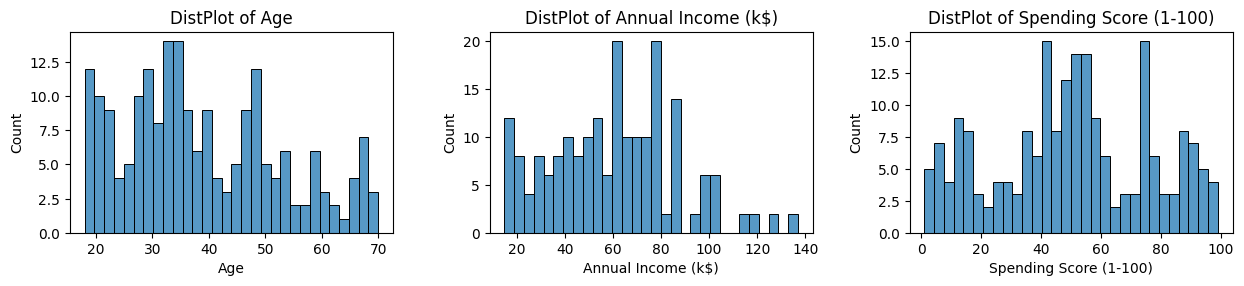

In [37]:
plt.figure(figsize = (15,6))
n=0
for x in ['Age','Annual Income (k$)','Spending Score (1-100)']:
    n += 1
    plt.subplot(2,3,n)
    plt.subplots_adjust(hspace=0.3,wspace = 0.3)
    sns.histplot(K_df[x],bins = 30)
    plt.title('DistPlot of {}'.format(x))
plt.show();

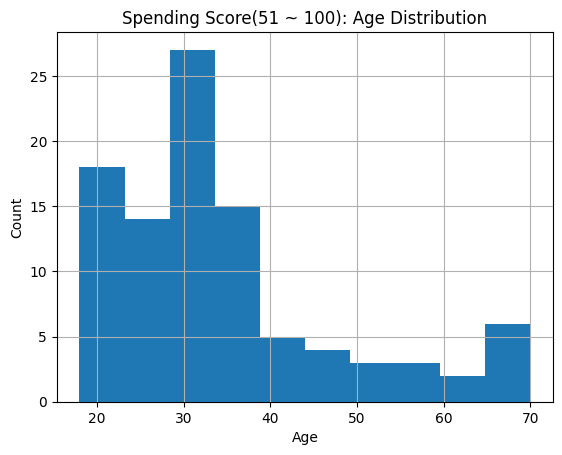

In [38]:
df_score['Age'].hist()
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Spending Score(51 ~ 100): Age Distribution');

In [39]:
fig=px.scatter(df_score,x='Annual Income (k$)',y='Spending Score (1-100)',color='Gender')
fig.show()

In [40]:
fig=px.histogram(df_score,x='Annual Income (k$)',y='Spending Score (1-100)',color='Gender')
fig.show()

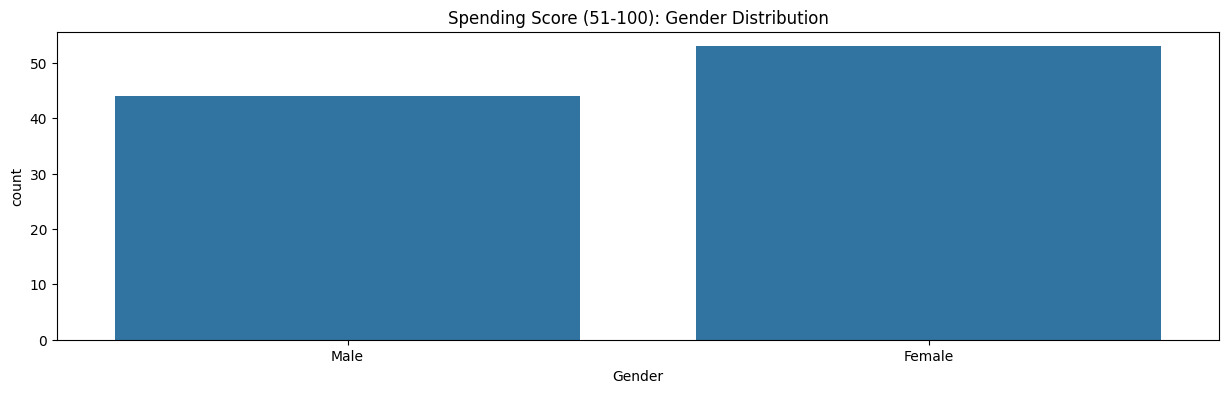

In [60]:
plt.figure(figsize = (15,4))
sns.countplot(x='Gender',data = df_score)
plt.title('Spending Score (51-100): Gender Distribution')
plt.show();

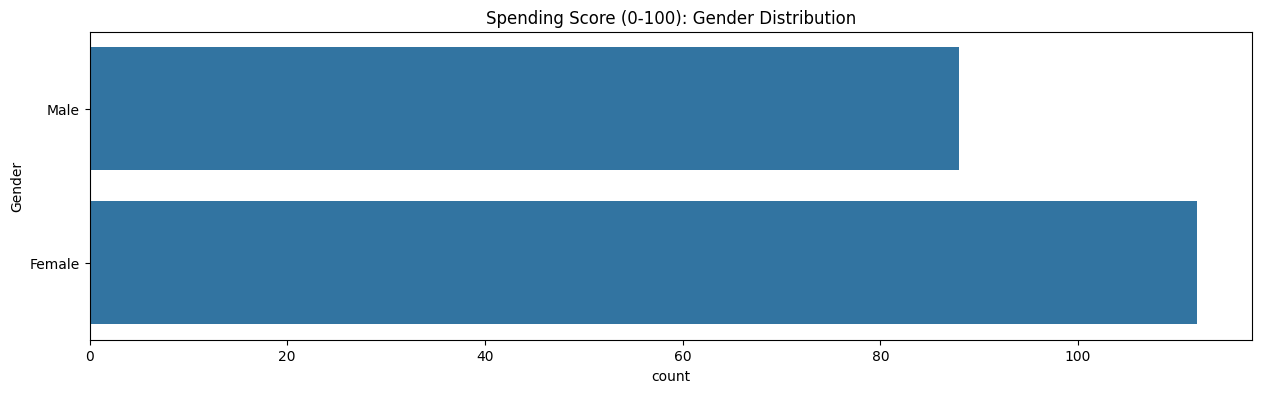

In [59]:
plt.figure(figsize = (15,4))
sns.countplot(y='Gender',data = K_df)
plt.title('Spending Score (0-100): Gender Distribution')
plt.show();

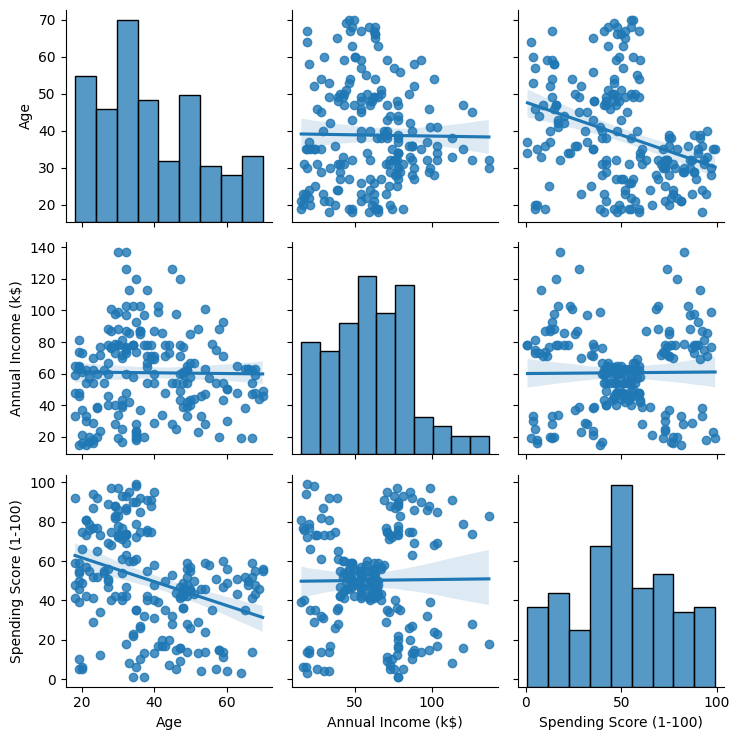

In [63]:
import warnings
warnings.filterwarnings("ignore",category =UserWarning)
sns.pairplot(K_df[['Age','Annual Income (k$)','Spending Score (1-100)']],kind='reg')
plt.tight_layout()
plt.show();

In [80]:
X = K_df.iloc[:,[3,4]]
print(f"X Shape {X.shape}")
X.head()

X Shape (200, 2)


,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [81]:
n_clusters = range(2,13)
inertia_errors = []
silhouette_scores = []
for k in n_clusters:
    model = KMeans(n_clusters = k,random_state=42,n_init=10)
    model.fit(X)
    inertia_errors.append(model.inertia_)
    silhouette_scores.append(silhouette_score(X,model.labels_))
print("Inertia:",inertia_errors[:3])
print()
print("Silhouette Scores:",silhouette_scores[:3])

Inertia: [181363.59595959607, 106348.37306211119, 73679.78903948837]

Silhouette Scores: [0.2968969162503008, 0.46761358158775435, 0.4931963109249047]


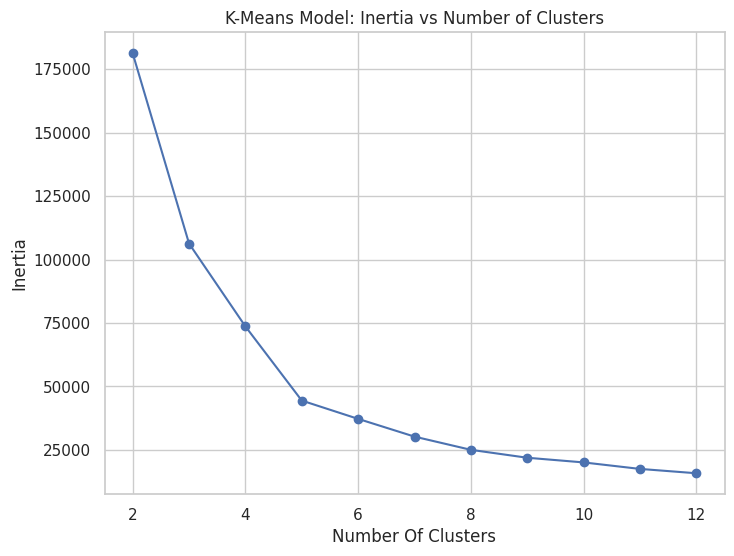

In [90]:
x_values = list(range(2, 13))
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
plt.plot(x_values, inertia_errors, marker='o', linestyle='-', color='b')
plt.title('K-Means Model: Inertia vs Number of Clusters')
plt.xlabel('Number Of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [91]:
final_model = KMeans(n_clusters=5,random_state=42,n_init=10)
final_model.fit(X)

KMeans(n_clusters=5, n_init=10, random_state=42)

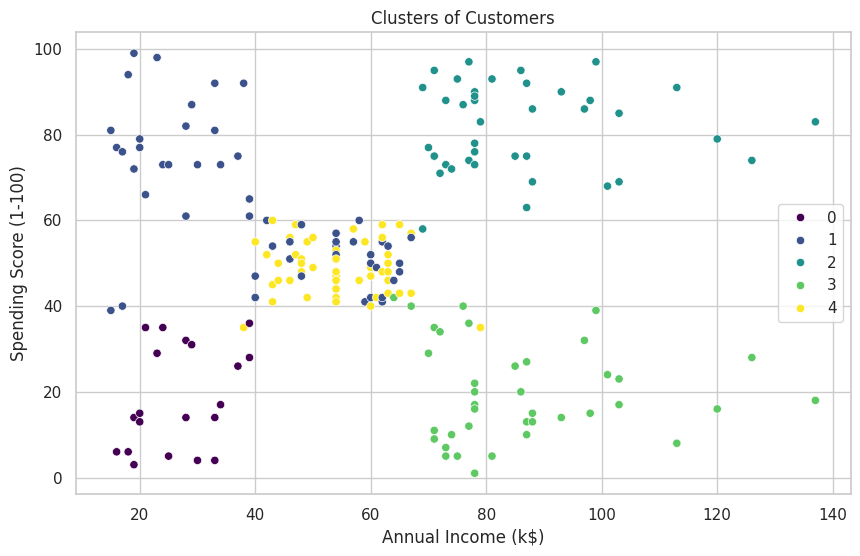

In [95]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=K_df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='viridis')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()


In [97]:
xgb = X.groupby(final_model.labels_).mean()
xgb

,Annual Income (k$),Spending Score (1-100)
0,55.296296,49.518519
1,86.538462,82.128205
2,25.727273,79.363636
3,88.200000,17.114286
4,26.304348,20.913043


In [99]:
labels = final_model.labels_
centroids = final_model.cluster_centers_
print(labels[:5])
print(centroids[:5])

[4 2 4 2 4]
[[55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [25.72727273 79.36363636]
 [88.2        17.11428571]
 [26.30434783 20.91304348]]


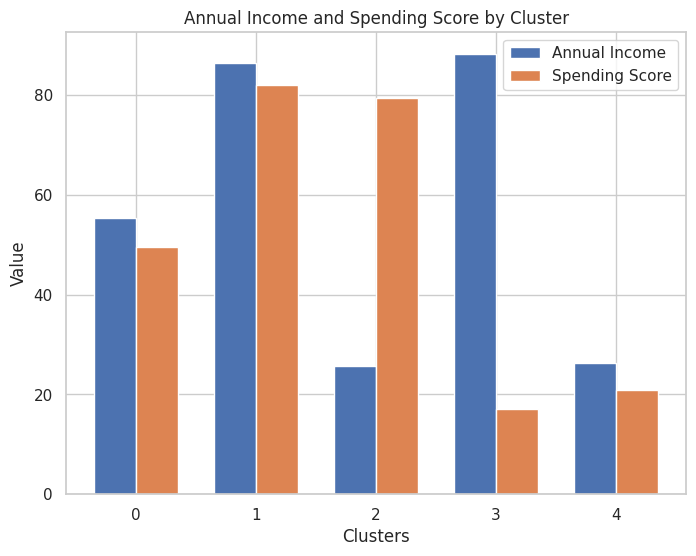

In [100]:
plt.figure(figsize=(8, 6))
x = [0,1,2,3,4]
x_labels = labels
income_values = xgb['Annual Income (k$)']
spending_values = xgb['Spending Score (1-100)']
bar_width = 0.35
index = range(len(x))
plt.bar(index, income_values, bar_width, label='Annual Income')
plt.bar([i + bar_width for i in index], spending_values, bar_width, label='Spending Score')
plt.xlabel('Clusters')
plt.ylabel('Value')
plt.title('Annual Income and Spending Score by Cluster')
plt.xticks([i + bar_width / 2 for i in index], x)
plt.legend()
plt.show()

In [101]:
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_centers_df = pd.DataFrame(cluster_centers, columns=features)
cluster_centers_df['Cluster'] = range(optimal_k)


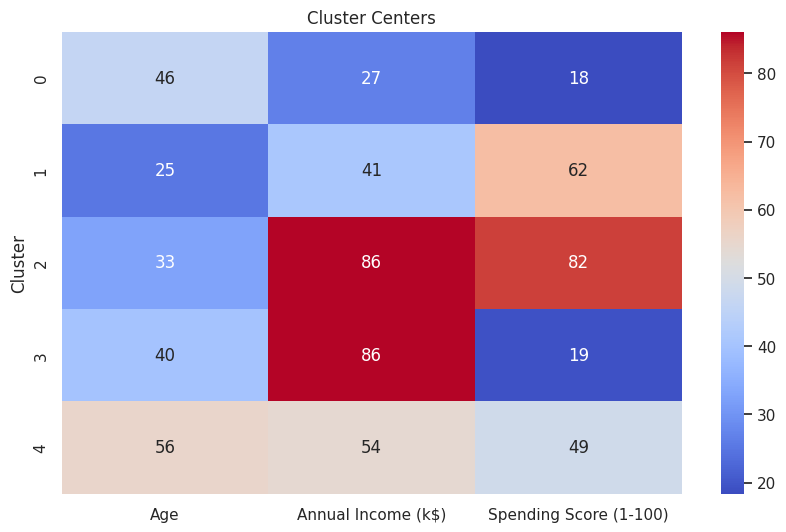

In [102]:
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_centers_df.set_index('Cluster'), annot=True, cmap='coolwarm')
plt.title('Cluster Centers')
plt.show()

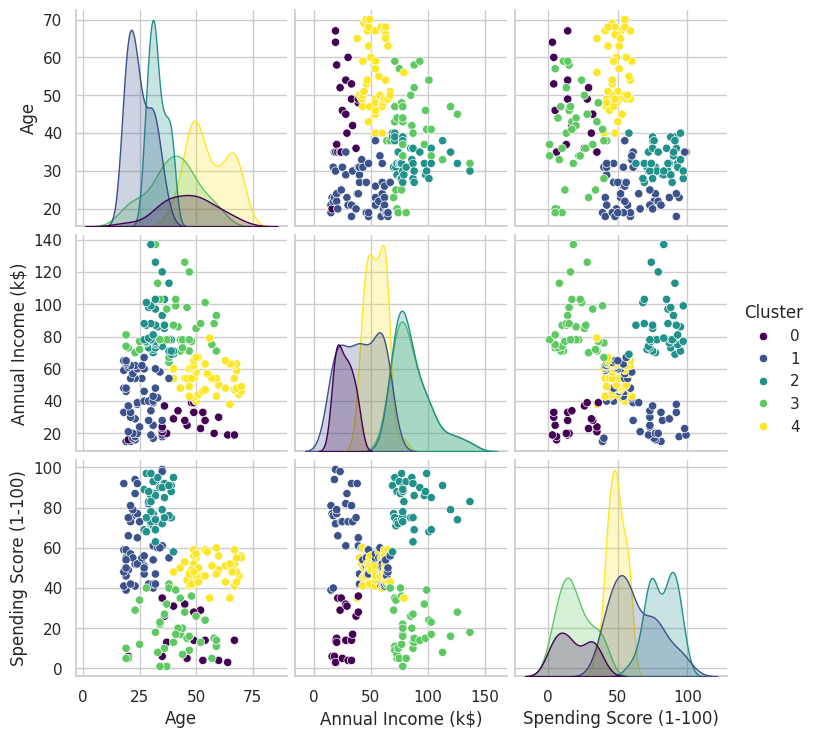

In [104]:
sns.pairplot(K_df, hue='Cluster', palette='viridis', vars=features)
plt.show()

In [106]:
cluster_summary = K_df.groupby('Cluster')[features].mean().reset_index()
print(cluster_summary)

# Save the clustered data
K_df.to_csv('clustered_customers.csv', index=False)

   Cluster        Age  Annual Income (k$)  Spending Score (1-100)
0        0  46.250000           26.750000               18.350000
1        1  25.185185           41.092593               62.240741
2        2  32.875000           86.100000               81.525000
3        3  39.871795           86.102564               19.358974
4        4  55.638298           54.382979               48.851064
